In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [24]:
# Load dataset
file_path = '/Users/kp/Desktop/App_Dev/AA1-501-Team5-Final/data/age_gender.csv'
df = pd.read_csv(file_path)

In [25]:
# Display EDA information from original dataset
print(df.info())
print(df.head())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB
None
   age  ethnicity  gender                        img_name  \
0    1          2       0  20161219203650636.jpg.chip.jpg   
1    1          2       0  20161219222752047.jpg.chip.jpg   
2    1          2       0  20161219222832191.jpg.chip.jpg   
3    1          2       0  20161220144911423.jpg.chip.jpg   
4    1          2       0  20161220144914327.jpg.chip.jpg   

                                              pixels  
0  129 128 128 126 127 130 133 135 139 142 145 14...  
1  164 74 111 168 169 171 175 182 184 188 193 199...  
2  67 70 71 70 69 67 70 79 90 

In [26]:
# Data preprocessing begins here

In [27]:
# Drop unnecessary column of img_name
df.drop('img_name', axis=1, inplace=True)

In [28]:
# Check the lengths of the pixel sequences
pixel_lengths = df['pixels'].apply(lambda x: len(x.split()))
print(pixel_lengths.value_counts())

pixels
2304    23705
Name: count, dtype: int64


In [29]:
# Expected length for 48x48 images
expected_length = 48 * 48

# Filter out any rows with incorrect pixel lengths
df = df[pixel_lengths == expected_length]

In [30]:
# Verify that all remaining sequences have the correct length
pixel_lengths = df['pixels'].apply(lambda x: len(x.split()))
print(pixel_lengths.value_counts())

pixels
2304    23705
Name: count, dtype: int64


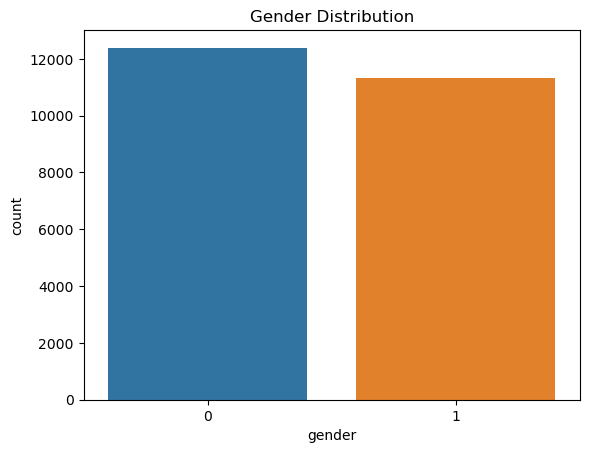

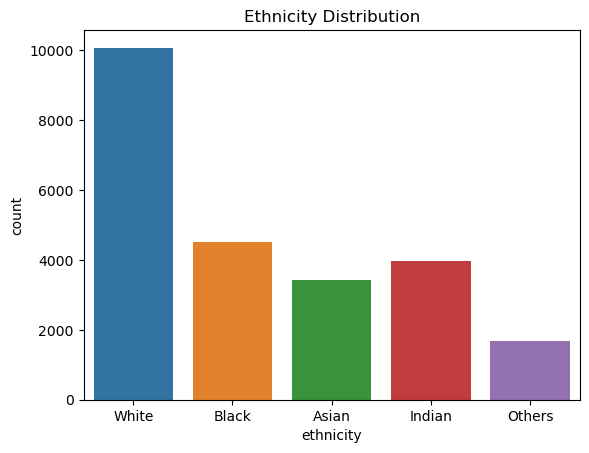

In [31]:
# Visualize the distribution of gender labels
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Define the labels for the ethnicities
ethnicity_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']

# Visualize the distribution of ethnicity labels with custom x-axis labels
sns.countplot(x='ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xticks(ticks=np.arange(len(ethnicity_labels)), labels=ethnicity_labels)
plt.show()

In [32]:
# Convert the 'pixels' column to arrays
X = np.array(df['pixels'].apply(lambda x: np.array(x.split(), dtype='float32')).tolist())

In [33]:
# Flatten arrays to vectors for FFN
X = X.reshape(-1, 48 * 48)

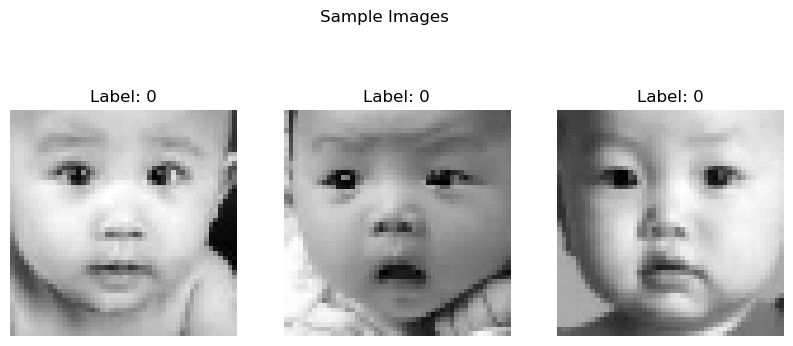

In [34]:
# Display a few sample images
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape(48, 48), cmap='gray')
    plt.title(f'Label: {df["gender"].iloc[i]}')
    plt.axis('off')
plt.suptitle('Sample Images')
plt.show()

In [35]:
# Normalize the pixel values
X = X / 255.0

In [36]:
# Gender model begins here

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7050 - loss: 2.6361 - val_accuracy: 0.7895 - val_loss: 1.4009 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7844 - loss: 1.2522 - val_accuracy: 0.8070 - val_loss: 0.8470 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7986 - loss: 0.8038 - val_accuracy: 0.5646 - val_loss: 0.9421 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8032 - loss: 0.6506 - val_accuracy: 0.8154 - val_loss: 0.5796 - learning_rate: 2.0000e-04
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8199 - loss: 0.5663 - val_accuracy: 0.8513 - val_loss: 0.4929 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8255 - loss: 0.5204 - val_accuracy: 0.8091 - val_loss: 0.5022 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8304 - los

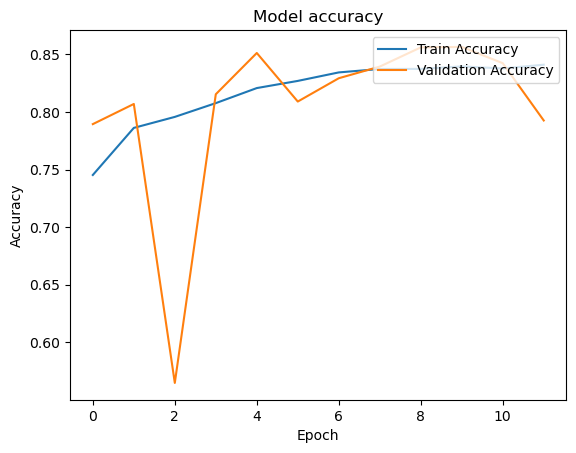

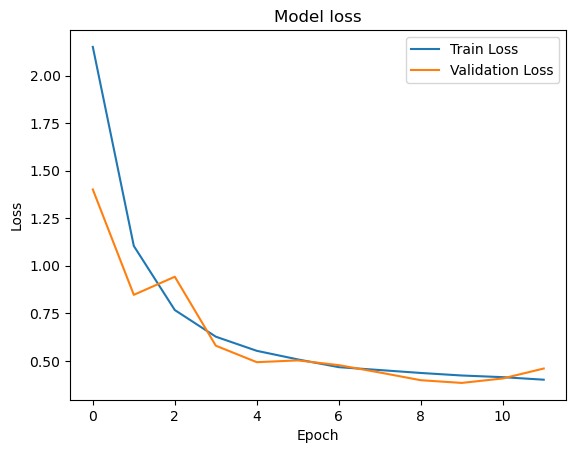

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7080 - loss: 2.6120 - val_accuracy: 0.6488 - val_loss: 1.8136 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7860 - loss: 1.2431 - val_accuracy: 0.7768 - val_loss: 0.9174 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8008 - loss: 0.8062 - val_accuracy: 0.7157 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7877 - loss: 0.6782 - val_accuracy: 0.6598 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7865 - loss: 0.6296 - val_accuracy: 0.5822 - val_loss: 1.7205 - learning_rate: 0.0010
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8175 - loss: 0.5180 - val_accuracy: 0.8410 - val_loss: 0.4449 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8260 - loss: 

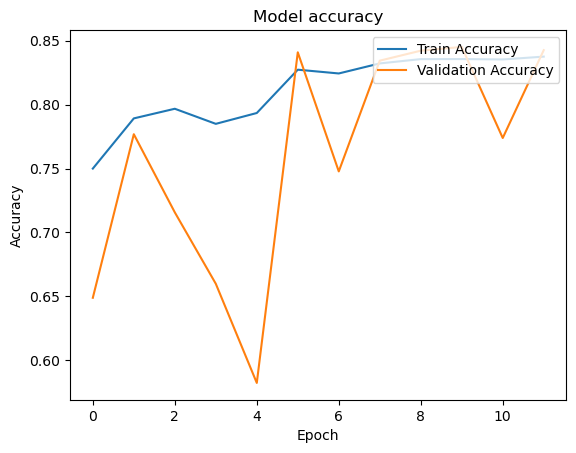

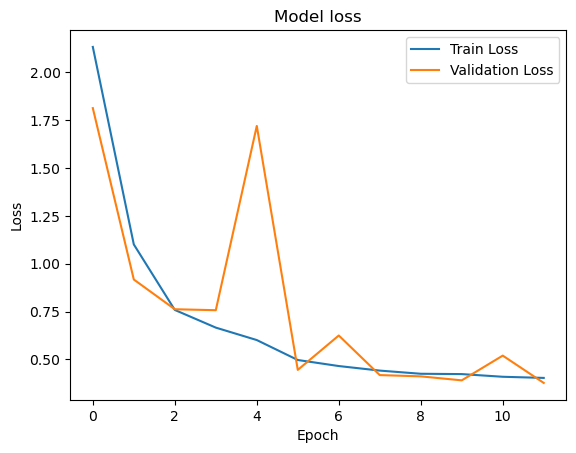

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7009 - loss: 2.6403 - val_accuracy: 0.6718 - val_loss: 1.6808 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7850 - loss: 1.2727 - val_accuracy: 0.6459 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7774 - loss: 0.8523 - val_accuracy: 0.5288 - val_loss: 1.4611 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8149 - loss: 0.6334 - val_accuracy: 0.8180 - val_loss: 0.5788 - learning_rate: 2.0000e-04
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8336 - loss: 0.5413 - val_accuracy: 0.7724 - val_loss: 0.6312 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8300 - loss: 0.5033 - val_accuracy: 0.8494 - val_loss: 0.4754 - learning_rate: 1.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8412 - los

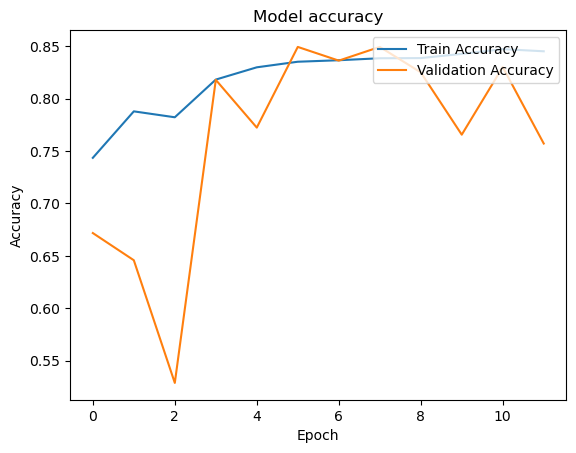

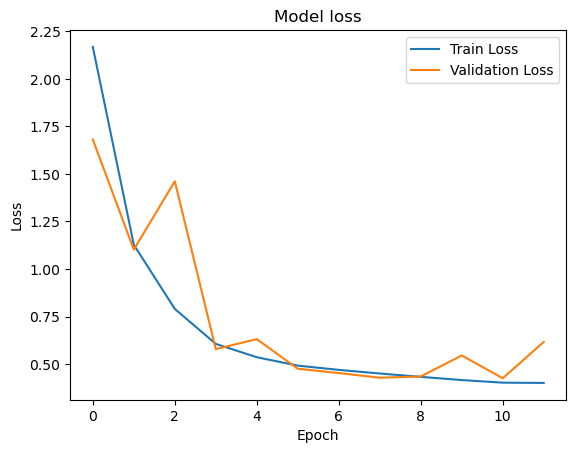

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6967 - loss: 2.6647 - val_accuracy: 0.6262 - val_loss: 1.5719 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7869 - loss: 1.2542 - val_accuracy: 0.7614 - val_loss: 0.9320 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7857 - loss: 0.8285 - val_accuracy: 0.6678 - val_loss: 0.8825 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7875 - loss: 0.6552 - val_accuracy: 0.6414 - val_loss: 1.0448 - learning_rate: 0.0010
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8117 - loss: 0.5597 - val_accuracy: 0.8226 - val_loss: 0.5237 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8291 - loss: 0.4945 - val_accuracy: 0.6838 - val_loss: 0.7877 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8359 - loss: 0

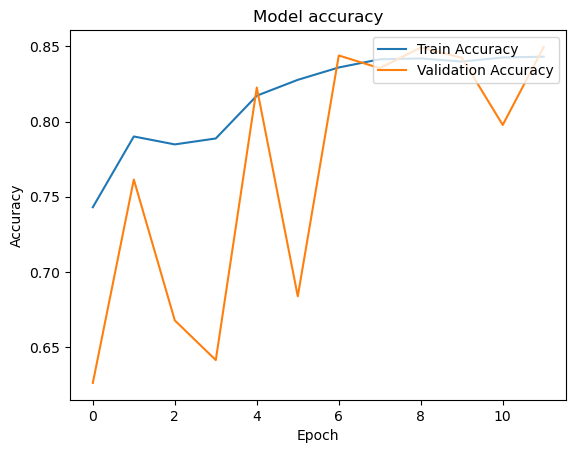

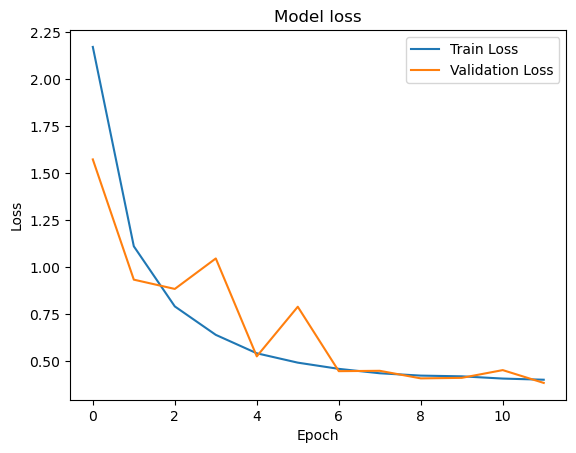

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6955 - loss: 2.6706 - val_accuracy: 0.7808 - val_loss: 1.4602 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7902 - loss: 1.2723 - val_accuracy: 0.7136 - val_loss: 1.0322 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7887 - loss: 0.8549 - val_accuracy: 0.5976 - val_loss: 0.9130 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7690 - loss: 0.7162 - val_accuracy: 0.5790 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7884 - loss: 0.6078 - val_accuracy: 0.5387 - val_loss: 1.9856 - learning_rate: 0.0010
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8054 - loss: 0.5541 - val_accuracy: 0.7557 - val_loss: 0.5793 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8111 - loss: 0.508

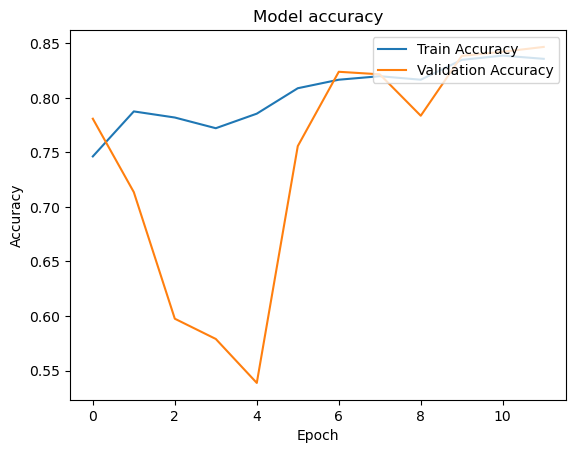

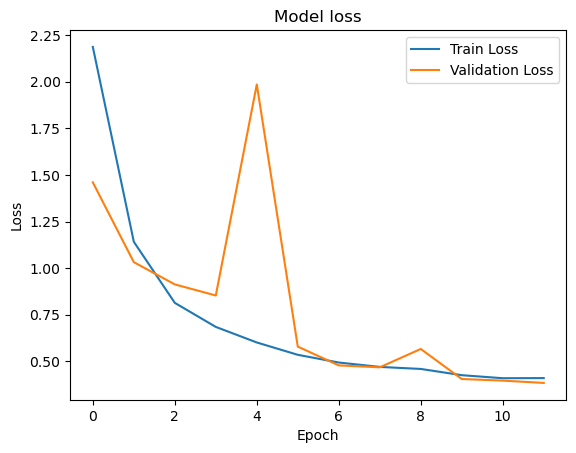

In [37]:
# Extract target variables for gender
y_gender = df['gender'].values

# Reshape y_gender for binary classification
y_gender = y_gender.reshape(-1, 1)

# Function to create the model
def create_model_gender():
    model = Sequential([
        Input(shape=(48 * 48,)),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary_crossentropy loss
    return model

# Lists to store results
val_accuracies = []
val_losses = []

# K-fold cross-validation

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_gender[train_index], y_gender[val_index]

    model = create_model_gender()

    # Define learning rate reduction callback
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

    # Train the model
    history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    val_accuracies.append(accuracy)
    val_losses.append(loss)

    # Plot training & validation accuracy values for each fold
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

    # Plot training & validation loss values for each fold
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

In [38]:
# Gender model results

Average Validation Accuracy: 81.78%
Average Validation Loss: 0.4439
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


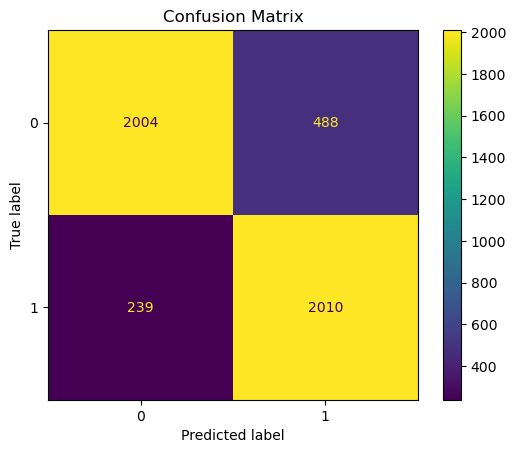

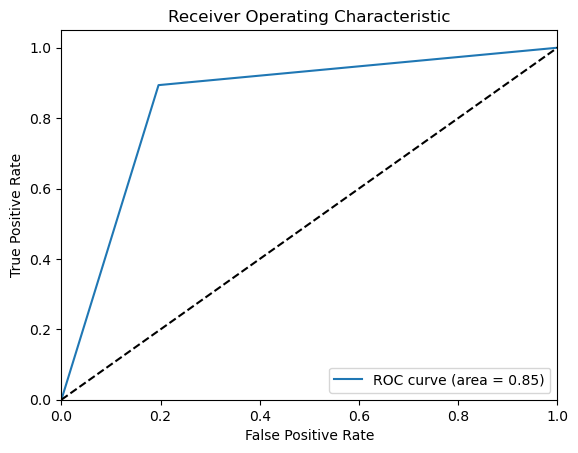

In [39]:
# Print average validation accuracy and loss
print(f'Average Validation Accuracy: {np.mean(val_accuracies)*100:.2f}%')
print(f'Average Validation Loss: {np.mean(val_losses):.4f}')

# Confusion Matrix
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Ethnicity model begins here

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4237 - loss: 3.6952 - val_accuracy: 0.4583 - val_loss: 2.5957 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 2.0795 - val_accuracy: 0.5153 - val_loss: 2.2396 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6474 - loss: 1.6003 - val_accuracy: 0.6368 - val_loss: 1.4605 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6575 - loss: 1.3758 - val_accuracy: 0.4647 - val_loss: 1.5835 - learning_rate: 0.0010
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6870 - loss: 1.1844 - val_accuracy: 0.7058 - val_loss: 1.1001 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7074 - loss: 1.0924 - val_accuracy: 0.6387 - val_loss: 1.1809 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7133 - loss: 1

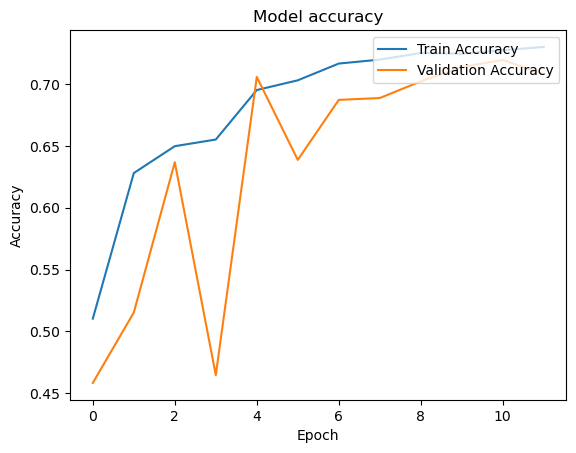

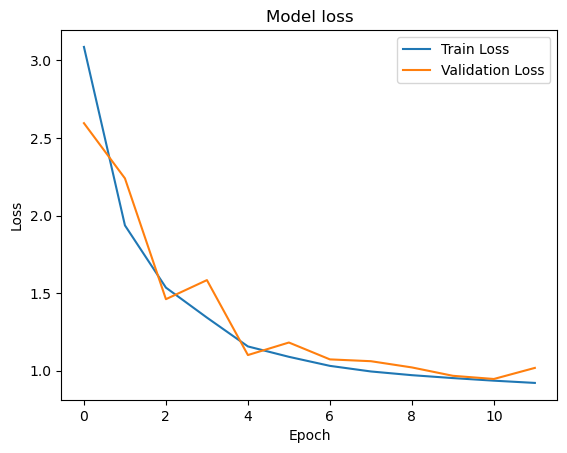

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4339 - loss: 3.6698 - val_accuracy: 0.4999 - val_loss: 2.5083 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6324 - loss: 2.0588 - val_accuracy: 0.6182 - val_loss: 1.7157 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6428 - loss: 1.6010 - val_accuracy: 0.5305 - val_loss: 1.6045 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6497 - loss: 1.3619 - val_accuracy: 0.6769 - val_loss: 1.2171 - learning_rate: 0.0010
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6609 - loss: 1.2261 - val_accuracy: 0.6186 - val_loss: 1.2554 - learning_rate: 0.0010
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6858 - loss: 1.0904 - val_accuracy: 0.6853 - val_loss: 1.0809 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7021 - loss: 1.019

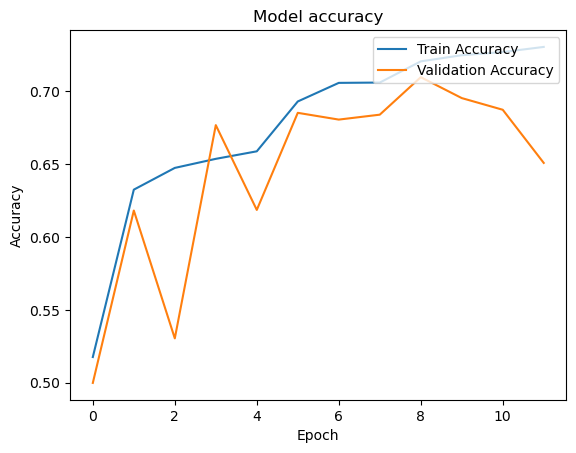

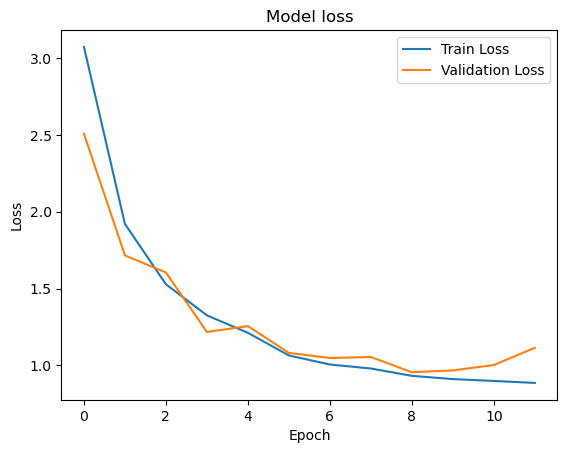

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4340 - loss: 3.7137 - val_accuracy: 0.5501 - val_loss: 2.3856 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6301 - loss: 2.0698 - val_accuracy: 0.4231 - val_loss: 2.1701 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6422 - loss: 1.5969 - val_accuracy: 0.4645 - val_loss: 2.4470 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6754 - loss: 1.3290 - val_accuracy: 0.7039 - val_loss: 1.2202 - learning_rate: 2.0000e-04
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7002 - loss: 1.2190 - val_accuracy: 0.6870 - val_loss: 1.2129 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6999 - loss: 1.1556 - val_accuracy: 0.7001 - val_loss: 1.1251 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6998 - los

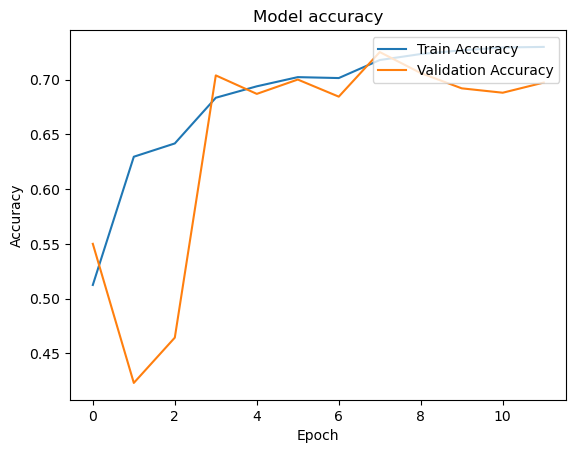

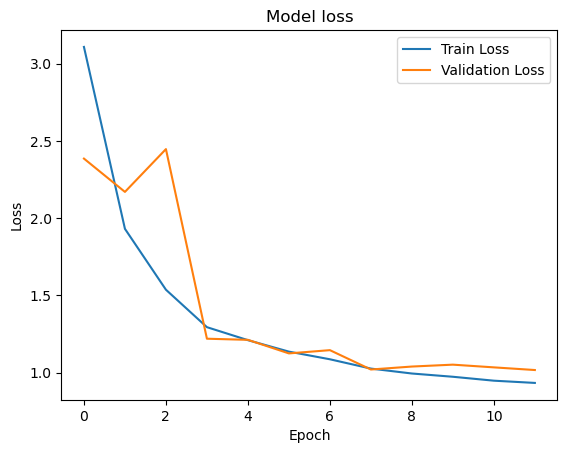

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4325 - loss: 3.6943 - val_accuracy: 0.5258 - val_loss: 2.3512 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6142 - loss: 2.0735 - val_accuracy: 0.6735 - val_loss: 1.6222 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6465 - loss: 1.5762 - val_accuracy: 0.4586 - val_loss: 1.7745 - learning_rate: 0.0010
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6747 - loss: 1.3120 - val_accuracy: 0.6977 - val_loss: 1.2124 - learning_rate: 2.0000e-04
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7042 - loss: 1.1886 - val_accuracy: 0.7115 - val_loss: 1.1350 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7060 - loss: 1.1337 - val_accuracy: 0.6927 - val_loss: 1.1278 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7043 - los

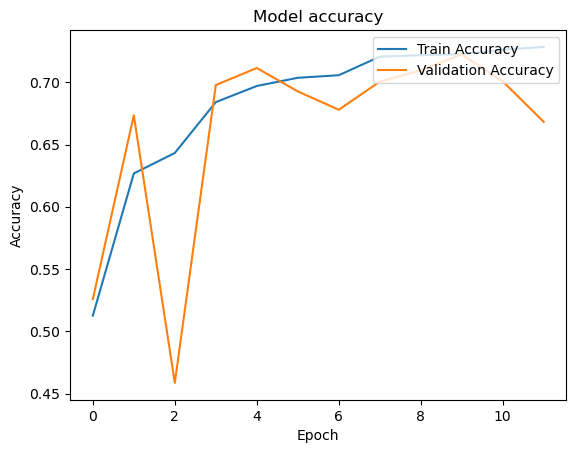

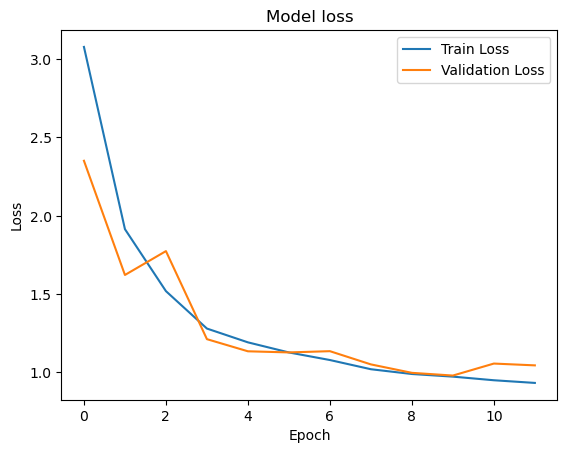

Epoch 1/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4392 - loss: 3.6148 - val_accuracy: 0.4839 - val_loss: 2.3367 - learning_rate: 0.0010
Epoch 2/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6192 - loss: 2.0502 - val_accuracy: 0.2786 - val_loss: 2.7258 - learning_rate: 0.0010
Epoch 3/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6669 - loss: 1.5664 - val_accuracy: 0.6220 - val_loss: 1.6007 - learning_rate: 2.0000e-04
Epoch 4/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6874 - loss: 1.4096 - val_accuracy: 0.7079 - val_loss: 1.3265 - learning_rate: 2.0000e-04
Epoch 5/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6938 - loss: 1.3107 - val_accuracy: 0.6929 - val_loss: 1.2599 - learning_rate: 2.0000e-04
Epoch 6/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7033 - loss: 1.2262 - val_accuracy: 0.7070 - val_loss: 1.1630 - learning_rate: 2.0000e-04
Epoch 7/12
593/593 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7059 -

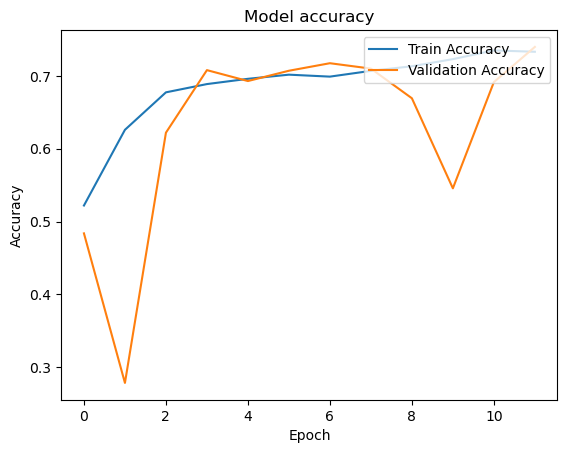

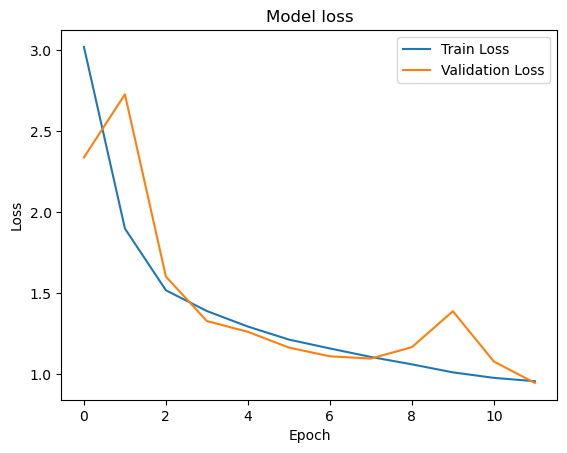

In [41]:
# Extract target variables for ethnicity
y_ethnicity = to_categorical(df['ethnicity'], 5)

# Normalize the pixel values
X = X / 255.0

# Function to create the model
def create_model_ethnicity():
    model = Sequential([
        Input(shape=(48 * 48,)),
        Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Lists to store results
val_accuracies = []
val_losses = []

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# K-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_ethnicity[train_index], y_ethnicity[val_index]

    model = create_model_ethnicity()

    # Define learning rate reduction callback
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

    # Train the model
    history = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    val_accuracies.append(accuracy)
    val_losses.append(loss)

    # Plot training & validation accuracy values for each fold
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

    # Plot training & validation loss values for each fold
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

Average Validation Accuracy: 69.28%
Average Validation Loss: 1.0277
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


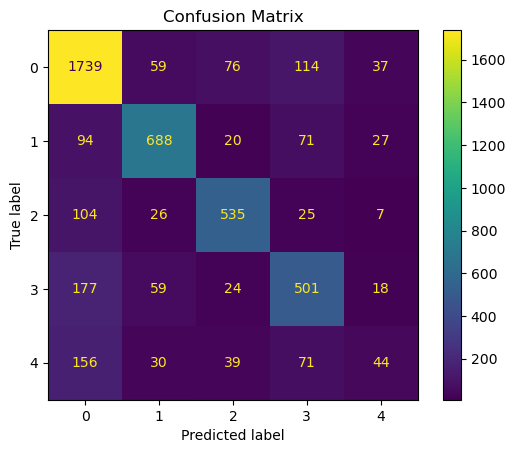

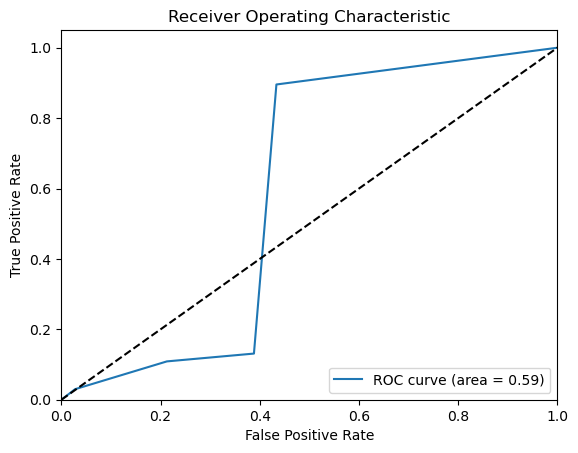

In [43]:
# Ethnicity model results

# Print average validation accuracy and loss for ethnicity model results
print(f'Average Validation Accuracy: {np.mean(val_accuracies)*100:.2f}%')
print(f'Average Validation Loss: {np.mean(val_losses):.4f}')

# Confusion Matrix
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_val_true, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (optional for multi-class, but usually binary)
fpr, tpr, _ = roc_curve(y_val_true, y_val_pred, pos_label=1)  # Ensure pos_label is set correctly for your class
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()